In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo con Colores RGB

* Codificación [__R__(ed)__G__(reen)__B__(lue)](https://es.wikipedia.org/wiki/RGB) para los colores en informática

* En [este enlace](https://www.rapidtables.com/web/color/RGB_Color.html) puedes seleccionar un color a ojo y obtener su valor RGB

* Colores _cercanos_ tendrán valores RGB cercanos

## Funciones del SOM

Usaremos un SOM bidimensional con `m x n` celdas.

Usaremos un array bidimensional más un eje donde colocaremos los pesos correspondientes a los canales __R__, __G__ y __B__, es decir, un vector de tres componentes de números enteros en el intervalo $[0,255]$.



La función `find_BMU` devuelve las coordenadas (en el grid) de la neurona BMU dado el mapa SOM y el vector de datos de entrenamiento `x`.

Los inputs son el mapa SOM y el vector de entrenamiento.

Devuelve las coordenadas $(g,h)$ de la BMU en el _grid_.

In [2]:
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

La función `update_weights()` tiene como _inputs_
* mapa SOM
* `x`: vector de entrenamiento (`train_ex(ample)`)
* los parámetros
    * tasa de aprendizaje
    * radio del kernel
    * coordenadas de la BMU en el grid
    * parámetro `step` relacionado con el máximo número de celdas a actualizar en cualquier dirección

Esta función actualiza los valores de los vectores _prototipos_ de las neuronas del mapa SOM.

Si el radio es cercano a cero, solamente actualiza la neurona BMU. En caso contrario, actualiza solamente las celdas en un vecindario de la BMU dado por `step`.

In [3]:
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord

    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM

    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    



La función `train_SOM` realiza el entrenamiento de la red neuronal. Requiere
* SOM inicializado o parcialmente entrenado
    * Es posible tener un mapa SOM parcialmente entrenado y guardar el resultado
* datos de entrenamiento, `x`
* los parámetros de aprendizaje:
    * tasa de aprendizaje
    * decay de aprendizaje
    * radio del _kernel_
    * decay del radio
    * número de _epochs_ de aprendizaje

In [4]:
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

## Datos de entrenamiento

* Fabricamos un ejemplo para usar el SOM

Inicializamos un conjunto de $n_x=3000$ datos de tipo __RGB__, es decir, tuplas de tres números enteros en el rango $[0,255]$. Cada uno de ellos lo podemos representar como un pixel coloreado con la función `imshow` del paquete `pyplot`.

In [8]:
n_x = 3000
rand = np.random.RandomState(0)
train_data = rand.randint(0, 255, (n_x, 3))
train_data.shape,train_data[0]

((3000, 3), array([172,  47, 117]))

### Histogramas de la distribución de cada canal

[]

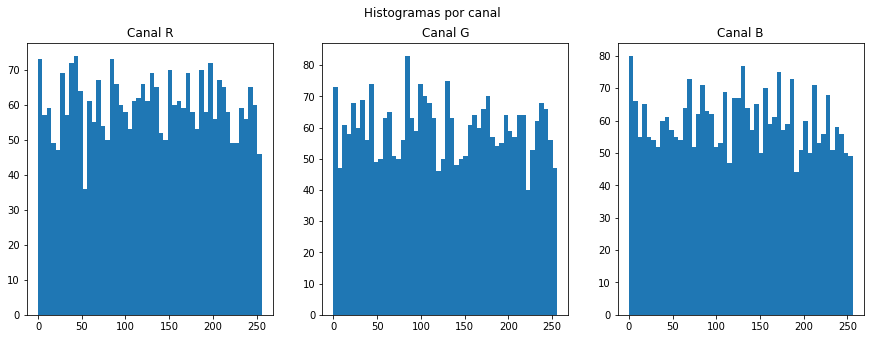

In [10]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 50
ax[0].hist(train_data[:][:,0],bins=bins,range=(0,256))
ax[0].set_title('Canal R')
ax[1].hist(train_data[:][:,1],bins=bins,range=(0,256))
ax[1].set_title('Canal G')
ax[2].hist(train_data[:][:,2],bins=bins,range=(0,256))
ax[2].set_title('Canal B')
f.suptitle('Histogramas por canal')
plt.plot()

In [9]:
train_data[0:10]

array([[172,  47, 117],
       [192,  67, 251],
       [195, 103,   9],
       [211,  21, 242],
       [ 36,  87,  70],
       [216,  88, 140],
       [ 58, 193, 230],
       [ 39,  87, 174],
       [ 88,  81, 165],
       [ 25,  77,  72]])

Representamos los __diez__ primeros datos usando la función [`imshow`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html)

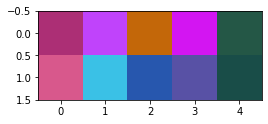

In [10]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
ax.imshow(train_data[0:10].reshape(2,5,3))

Representamos todos los datos iniciales

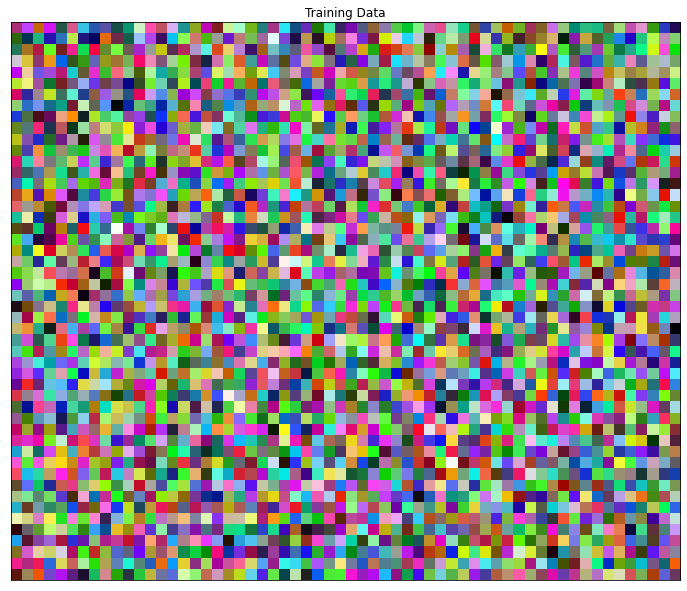

In [11]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 12), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(train_data.reshape(50, 60, 3))
ax.title.set_text('Training Data')

## Creamos una red SOM y la inicializamos

La red tiene un tamaño de $10\times 10$ nodos en un mallado bidimensional rectangular.

Inicializamos los 100 vectores con valores aleatorios en los tres atributos (R,G,B).

Mostramos dos inicializaciones diferentes.

[]

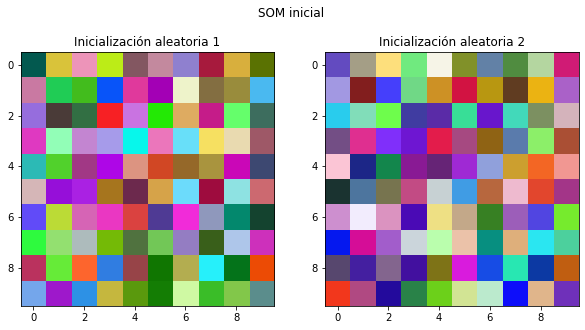

In [14]:
# Dimensiones
m = 10
n = 10

f,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
ax[0].imshow(SOM.astype('int'))
ax[0].set_title('Inicialización aleatoria 1')
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
ax[1].imshow(SOM.astype('int'))
ax[1].set_title('Inicialización aleatoria 2')
f.suptitle('SOM inicial')
plt.plot()

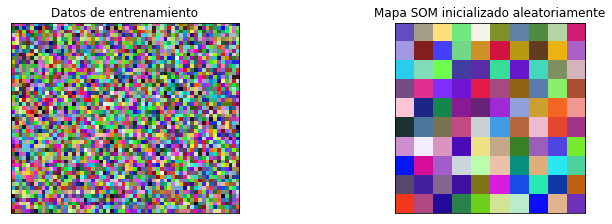

In [15]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Datos de entrenamiento')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Mapa SOM inicializado aleatoriamente')

## Entrenamiento del SOM

Visualizamos cómo evoluciona el mapa SOM en diferentes _epochs_ de aprendizaje

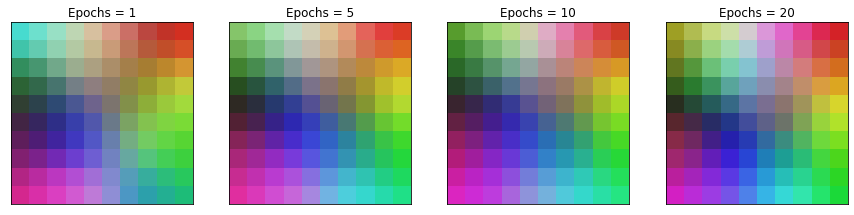

In [16]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

### Efecto del tamaño del SOM

Usamos un _grid_ de $20\times20$ neuronas

Realizamos dos entrenamientos a partir de condiciones iniciales diferentes

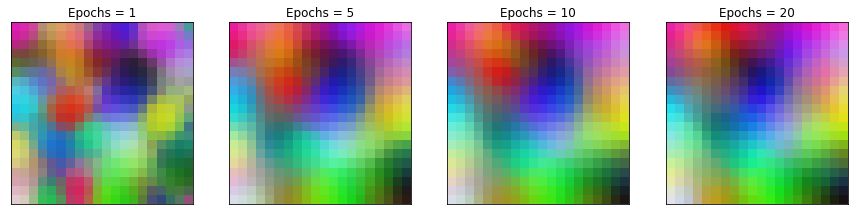

In [15]:
m = 20
n = 20

SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

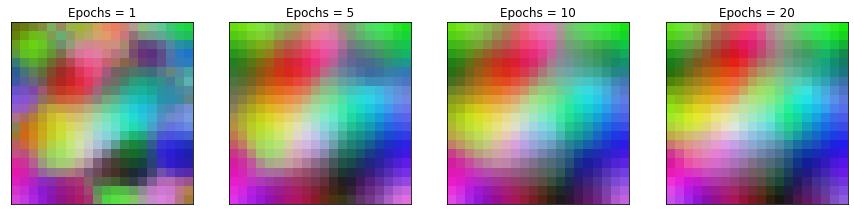

In [16]:
m = 20
n = 20

SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

::::{important}
No estamos convergiendo al mismo mapa, pero en ambos casos convergemos a un mapa que preserva las propiedades topológicas del espacio de datos de entrada.
::::

Comparamos las distribuciones de los canales de color en los datos de entrenamiento y en el SOM entrenado.

Text(0.5, 1.0, 'SOM Canal B')

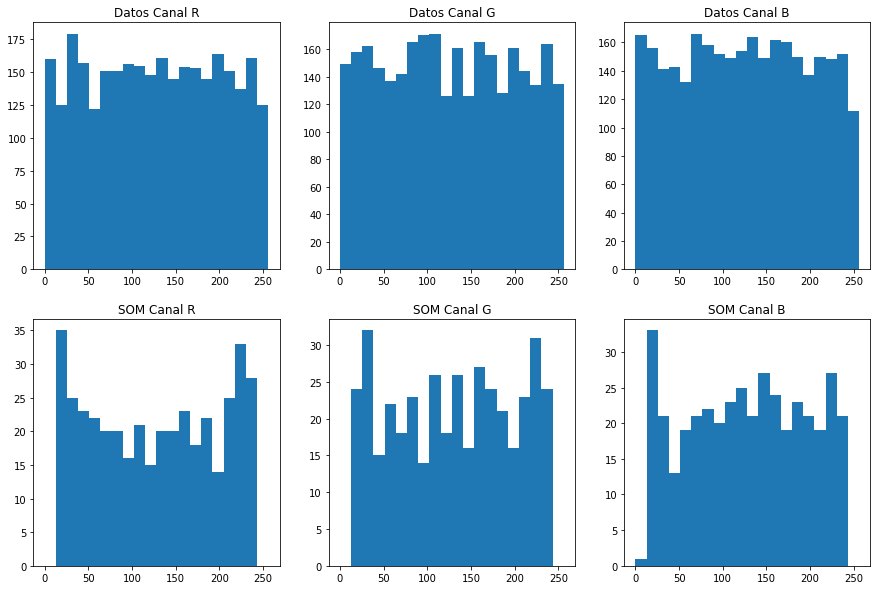

In [19]:
f,ax=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
bins = 20
ax[0,0].hist(train_data[:,0],bins=bins,range=(0,256))
ax[0,0].set_title('Datos Canal R')
ax[0,1].hist(train_data[:,1],bins=bins,range=(0,256))
ax[0,1].set_title('Datos Canal G')
ax[0,2].hist(train_data[:,2],bins=bins,range=(0,256))
ax[0,2].set_title('Datos Canal B')

bins = 20
ax[1,0].hist(SOM.reshape(m*n,3)[:,0],bins=bins,range=(0,256))
ax[1,0].set_title('SOM Canal R')
ax[1,1].hist(SOM.reshape(m*n,3)[:,1],bins=bins,range=(0,256))
ax[1,1].set_title('SOM Canal G')
ax[1,2].hist(SOM.reshape(m*n,3)[:,2],bins=bins,range=(0,256))
ax[1,2].set_title('SOM Canal B')

## Datos iniciales con _sesgo_

Realizamos la misma prueba con datos iniciales _sesgados_ hacia el rojo.

In [27]:
n_x = 3000
rand = np.random.RandomState(0)


train_data_R = rand.randint(175, 255, (n_x, 1))
train_data_G = rand.randint(0, 200, (n_x, 1))
train_data_B = rand.randint(0, 150, (n_x, 1))
train_data = np.zeros((n_x,3)).astype('int')
train_data[:,0] = train_data_R.reshape(n_x,)
train_data[:,1] = train_data_G.reshape(n_x,)
train_data[:,2] = train_data_B.reshape(n_x,)

# inicializamos el SOM
m = 20
n = 20

SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
SOMuntrained = SOM.copy()

# entrenamos el SOM
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    #ax[i].imshow(SOM.astype(int))
    #ax[i].title.set_text('Epochs = ' + str(total_epochs))


In [28]:
train_data[:10]

array([[201, 109, 145],
       [184,  87,  37],
       [247,  33,  11],
       [176, 114,  58],
       [251, 146,  15],
       [215,  95, 110],
       [221,  85,   0],
       [220,  16, 139],
       [210, 112, 122],
       [192, 189,  35]])

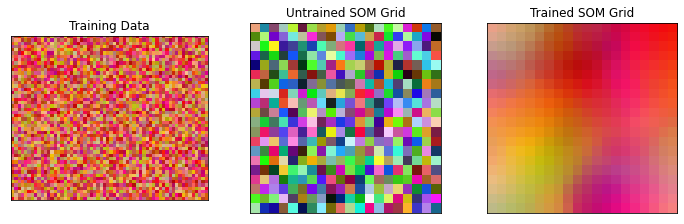

In [30]:
fig, ax = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOMuntrained.astype(int))
ax[1].title.set_text('Untrained SOM Grid')
ax[2].imshow(SOM.astype(int))
ax[2].title.set_text('Trained SOM Grid')

In [31]:
train_data[0:10,2]

array([145,  37,  11,  58,  15, 110,   0, 139, 122,  35])

Text(0.5, 1.0, 'SOM Canal B')

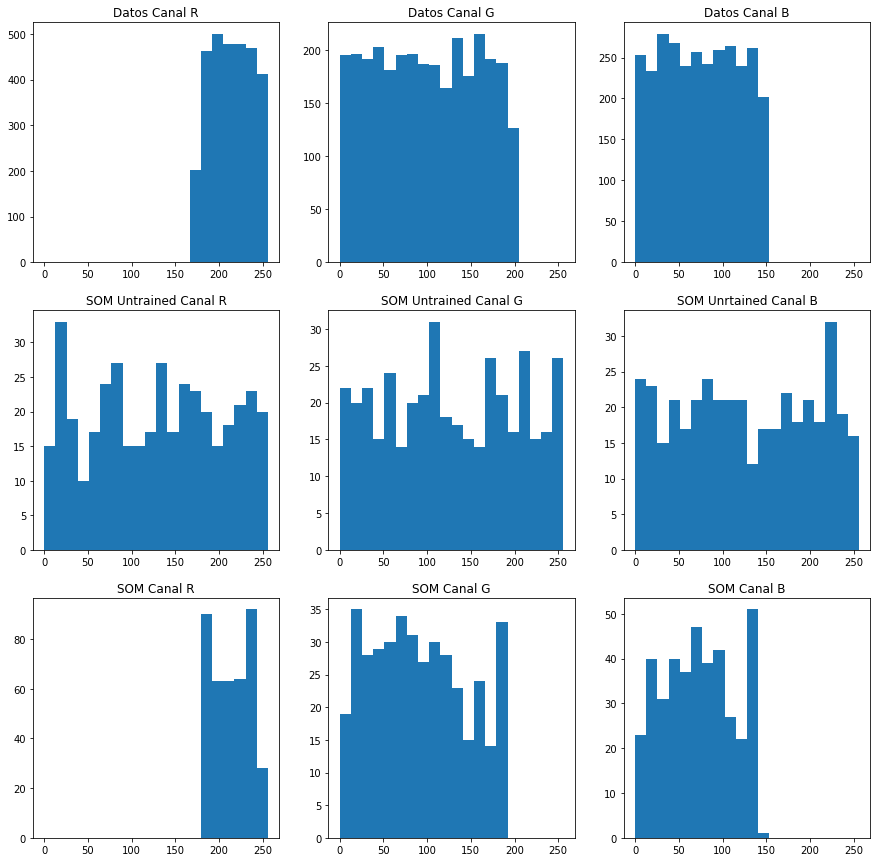

In [32]:
# representamos los histogramas

bins = 20

f,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

ax[0,0].hist(train_data[:,0],bins=bins,range=(0,256))
ax[0,0].set_title('Datos Canal R')
ax[0,1].hist(train_data[:,1],bins=bins,range=(0,256))
ax[0,1].set_title('Datos Canal G')
ax[0,2].hist(train_data[:,2],bins=bins,range=(0,256))
ax[0,2].set_title('Datos Canal B')

ax[1,0].hist(SOMuntrained.reshape(m*n,3)[:,0],bins=bins,range=(0,256))
ax[1,0].set_title('SOM Untrained Canal R')
ax[1,1].hist(SOMuntrained.reshape(m*n,3)[:,1],bins=bins,range=(0,256))
ax[1,1].set_title('SOM Untrained Canal G')
ax[1,2].hist(SOMuntrained.reshape(m*n,3)[:,2],bins=bins,range=(0,256))
ax[1,2].set_title('SOM Unrtained Canal B')

ax[2,0].hist(SOM.reshape(m*n,3)[:,0],bins=bins,range=(0,256))
ax[2,0].set_title('SOM Canal R')
ax[2,1].hist(SOM.reshape(m*n,3)[:,1],bins=bins,range=(0,256))
ax[2,1].set_title('SOM Canal G')
ax[2,2].hist(SOM.reshape(m*n,3)[:,2],bins=bins,range=(0,256))
ax[2,2].set_title('SOM Canal B')



## Efecto de los parámetros

Investigamos ahora el efecto que tienen los parámetros.

Realizamos gráficas de un SOM entrenado con un mallado de opciones para:
* la tasa de aprendizaje
* el radio del _kernel_ de vecindad

Para radios cercanos a cero (primera columna) el algoritmo de aprendizaje solamente cambia las celdas individuales, pero no las vecinas. No se crea un mapa donde exista el fenómeno de _emergencia_, independientemente del valor de la tasa de aprendizaje.

La tasa de aprendizaje marca la velocidad con la que el SOM puede alcanzar la convergencia. Una alta tasa de aprendizaje realiza cambios más bruscos en los vectores, creando más _ruido_, mientras que una baja tasa de aprendizaje realiza cambios más sutiles, pero son necesarias muchas iteraciones para llegar a converger.

__Importante:__ La correcta elección de los parámetros depende del caso de estudio.



In [25]:
m = 10
n = 10

SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

n_x = 3000
rand = np.random.RandomState(75)

train_data = rand.randint(0, 255, (n_x, 3))

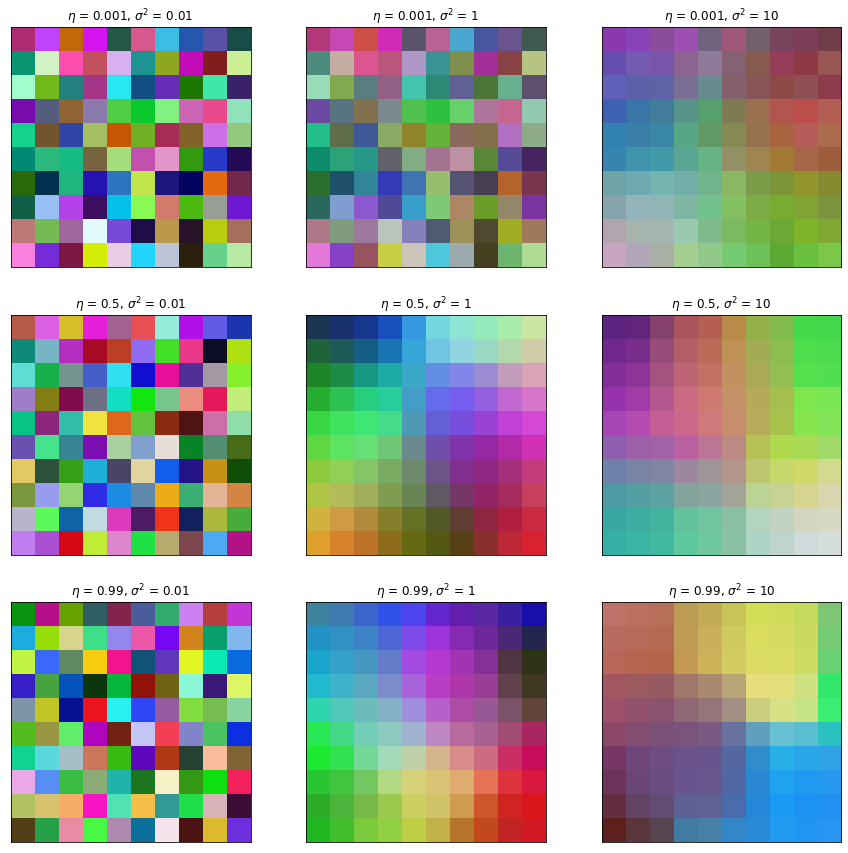

In [26]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))